# AI 2 Trust Interpretative

## Imports

In [24]:
# import pandas module 
import pandas as pd 
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Functions

In [29]:
# function to create word cloud 
def create_wordcloud(df_cloud, i_column):
    """ 
    creates a wordcload based on a dataframe column as input. 

    Parameters: 
    df_main (data frame): dataframe containing data
    i_column (string): Column 

    Returns: 
    int: wordcloud

    """
    
    # get the text 
    df_text = df_cloud.dropna(subset=[i_column]) 
    df_text = df_text[i_column]

    # take dataframe and put in text
    text = " ".join(itext for itext in df_text)

    stopwords = set(STOPWORDS)
    stopwords.update(["AI", "system", "organization", 'application', 'one',  "will", "need", 'without', 'something', 'make',
                       'based', 'stay', 'add', 'day', 'still', 'ie', 'way', 'made', 'market', "impact", "business", "needs", 
                      'company', 'organisation', 'ensure'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=30, background_color="white").generate(text)

    
    #change the value in return to set the single color need, in hsl format.
    def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#         return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))
        return "hsl(0, 0%%, %d%%)" % np.random.randint(0, 30)    
#         return "hsl(0, 100%, 0%)" % np.random.randint(60, 100)    
# hsl(0, 100%, 0%)
    
    #change the color setting
    wordcloud.recolor(color_func = grey_color_func)    
    
    
    # Display the generated image:
    plt.figure(figsize=(80, 60))    
    
#     fig.set_size_inches(18.5, 10.5)
#     fig.savefig('test2png.png', dpi=100)    
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    plt.savefig('images/test2.png', dpi=100)    
    
    plt.show()

## Prepare Data

In [30]:
# import header file
df = pd.read_excel('http://www.d5mit.co.za/artifacts/output.xlsx')

df = df[df['ai_transparency_to_trust'].notna()]

df.drop('email', axis='columns', inplace=True)
df.drop('first_name', axis='columns', inplace=True)
df.drop('last_name', axis='columns', inplace=True)
df.drop('custom_data', axis='columns', inplace=True)

df = df[df['ai_fat_to_trust'].notna()]

In [31]:
df.describe()

,Unnamed: 0,resp_id,colle_id,d_tools,d_capabilities,d_culture,d_acts_on_data,d_fin_benefits,d_non_fin_benefits,m_maturity_rating,...,sy_fairness_to_trust,sy_trust_to_adoption,sy_lack_trust_low_adoption,ai_transparency_to_trust,ai_accountability_to_trust,ai_fairness_to_trust,ai_trust_to_adoption,ai_lack_trust_low_adoption,ai_must_be_trans_expl,ai_fat_to_trust
count,135.000000,1.350000e+02,135.0,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,134.000000,135.000000,134.000000,135.000000,135.000000,135.000000
mean,69.503704,1.288961e+10,404063954.0,4.229630,4.429630,4.355556,4.325926,4.377778,4.288889,67.925926,...,4.259259,4.555556,4.592593,4.081481,4.365672,4.185185,4.485075,4.562963,4.466667,4.562963
std,39.626027,3.987321e+06,0.0,0.854669,0.728326,0.786705,0.827058,0.771379,0.780993,21.394877,...,0.679804,0.581643,0.746097,0.970089,0.710195,0.848046,0.597426,0.593590,0.620544,0.580882
min,1.000000,1.288637e+10,404063954.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000
25%,35.500000,1.288657e+10,404063954.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,50.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,69.000000,1.288914e+10,404063954.0,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,72.000000,...,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000
75%,103.500000,1.288938e+10,404063954.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,85.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,138.000000,1.289784e+10,404063954.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Data Exploration

The questions are in the context of implementing AI applications.



### Other Ethical considerations

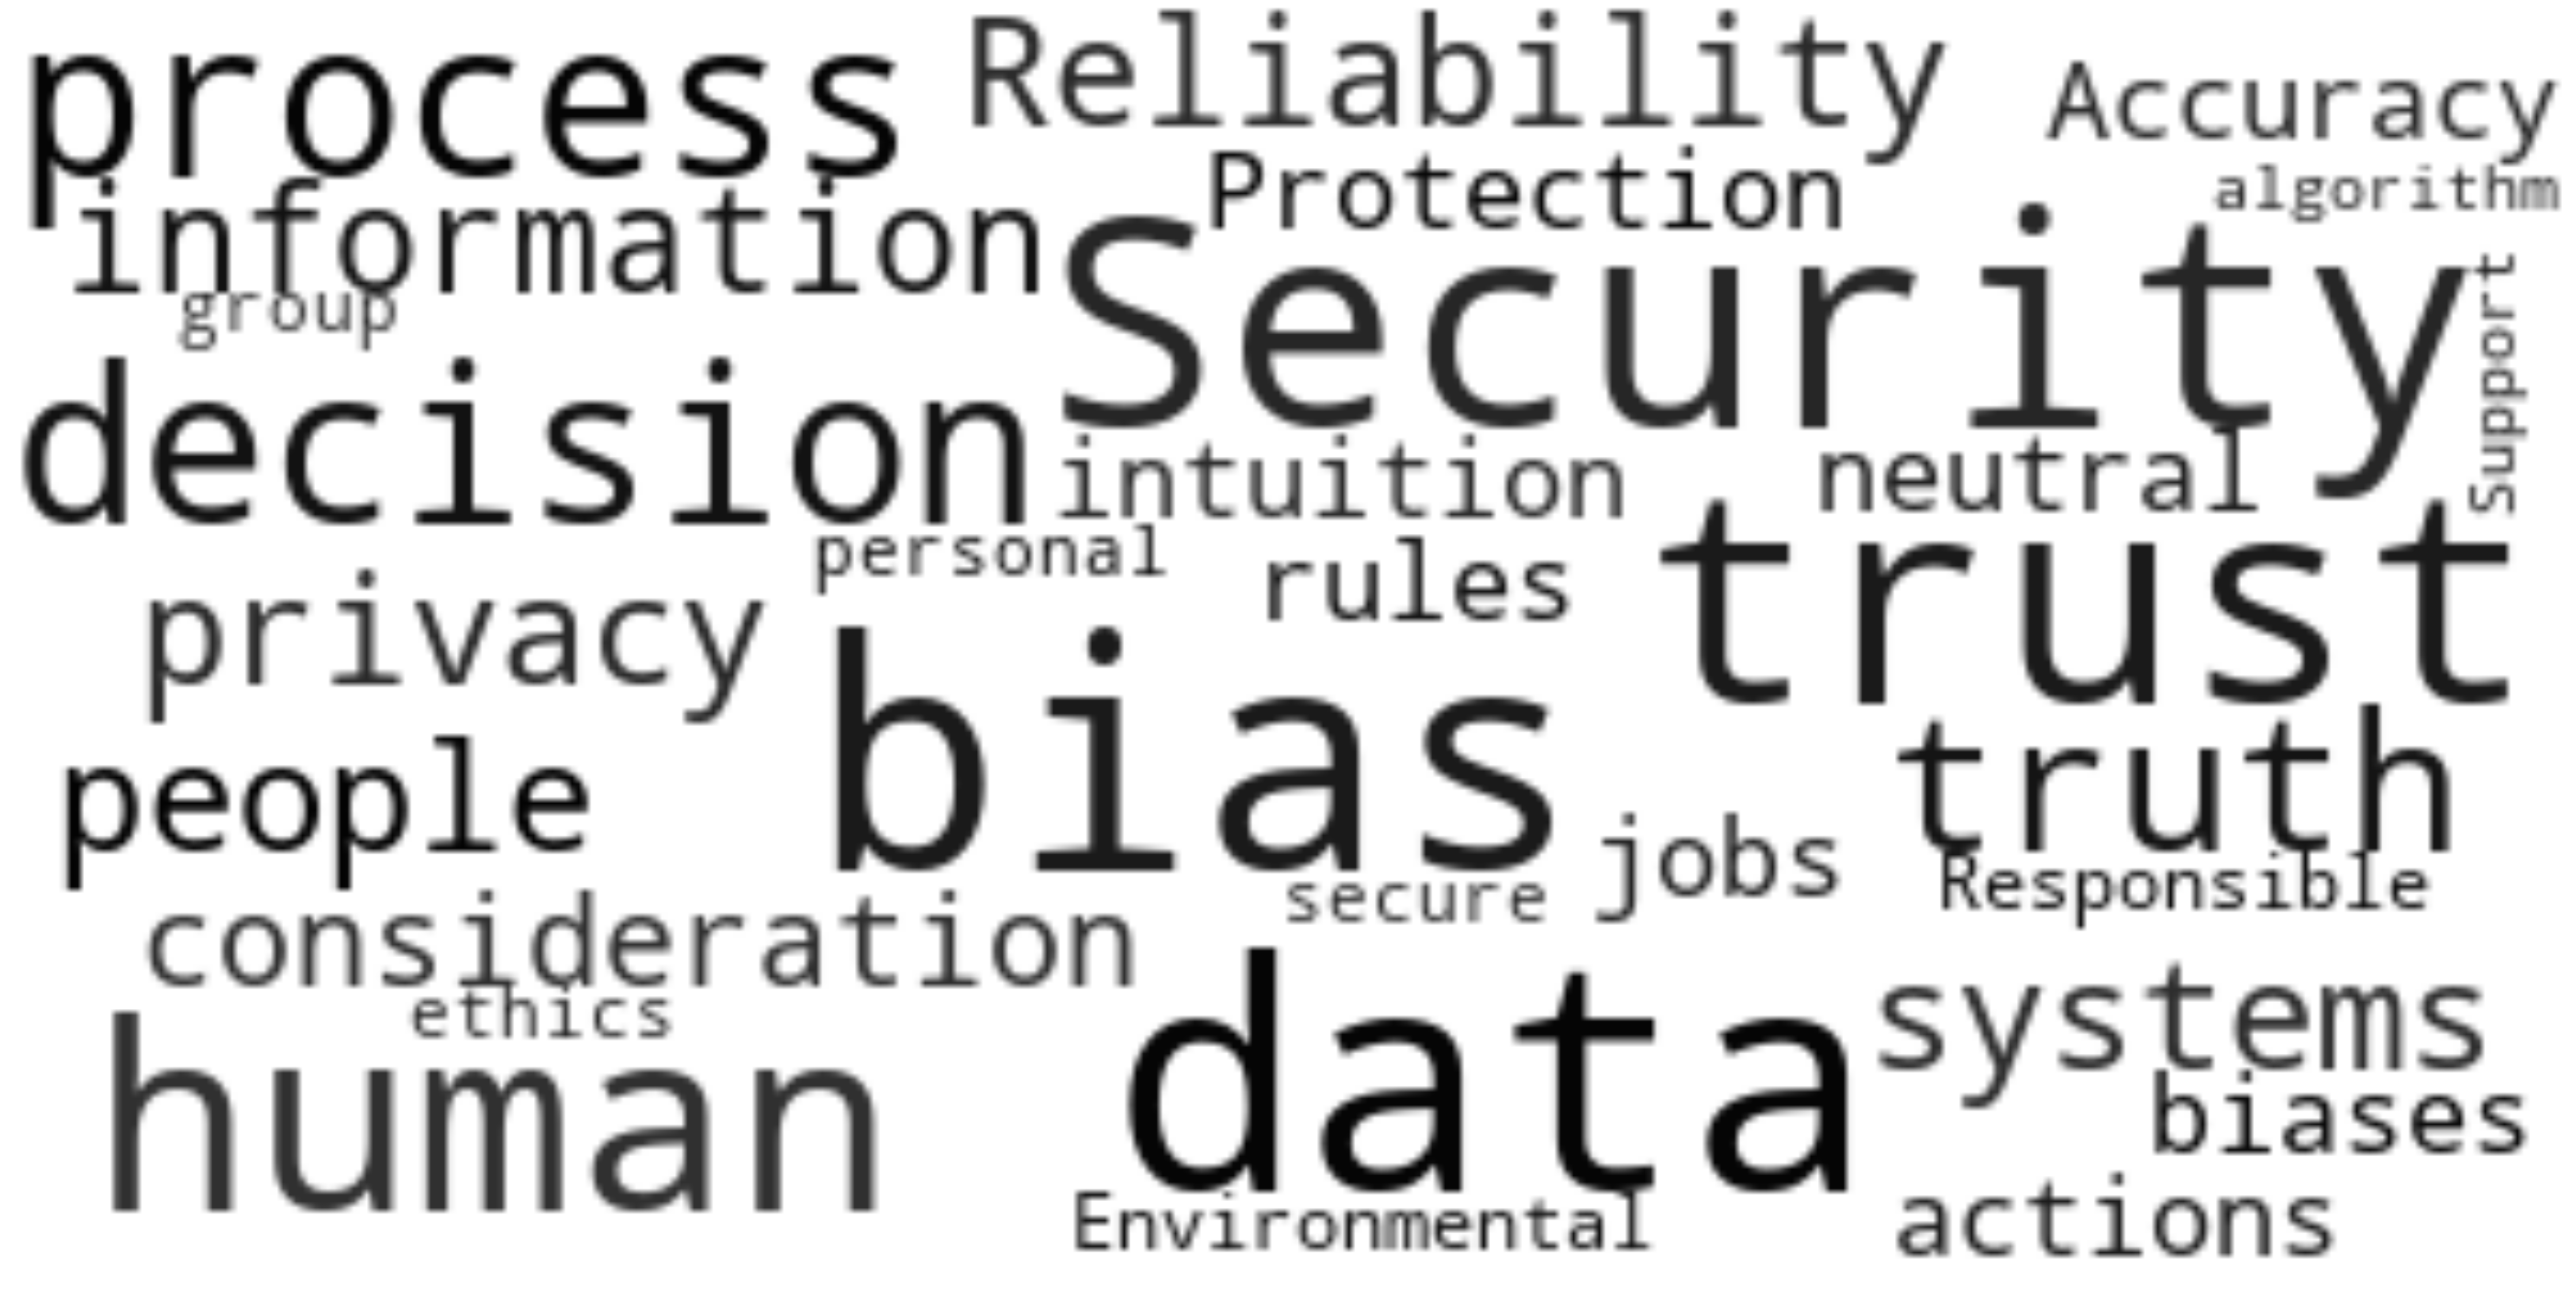

In [32]:
create_wordcloud(df, 'ai_ethical_considerations')